<a href="https://colab.research.google.com/github/leandrobarbieri/python-datascience-ml/blob/main/%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de decisão e florestas aleatórias
- dividir o dado com base nos atributos que melhor separam os cojuntos "ganho de informação"
- muito sucetível a overfiting

> https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtendo os dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/leandrobarbieri/python-datascience-ml/main/5.%20Machine%20Learning/%C3%81rvores%20de%20decis%C3%A3o%20e%20Florestas%20Aleat%C3%B3rias/kyphosis.csv")

print(df.shape)
df.head(10)


(81, 4)


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


## Visualizando os dados

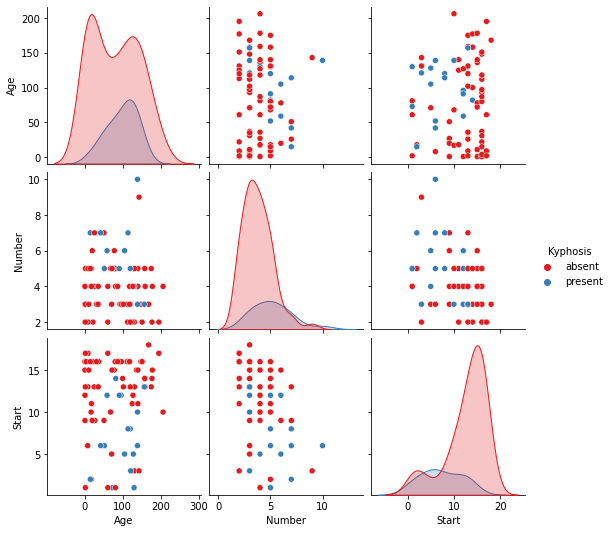

In [ ]:
sns.pairplot(df, hue="Kyphosis", palette="Set1")

## Divisão Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

# remove o target nas colunas
X = df.drop("Kyphosis", axis=1)

# target
y = df["Kyphosis"]

# separa o x e y em treino e teste (avaliar o modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

## Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# treinamento
model.fit(X_train, y_train)

# previsões
pred = model.predict(X_test)

In [ ]:
# Avaliação
from sklearn.metrics import classification_report, confusion_matrix

# Esses tipos de relatórios de avaliação são validos apenas para modelos de classificação
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15  4]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.79      0.79      0.79        19
     present       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



## Visualização da árvore

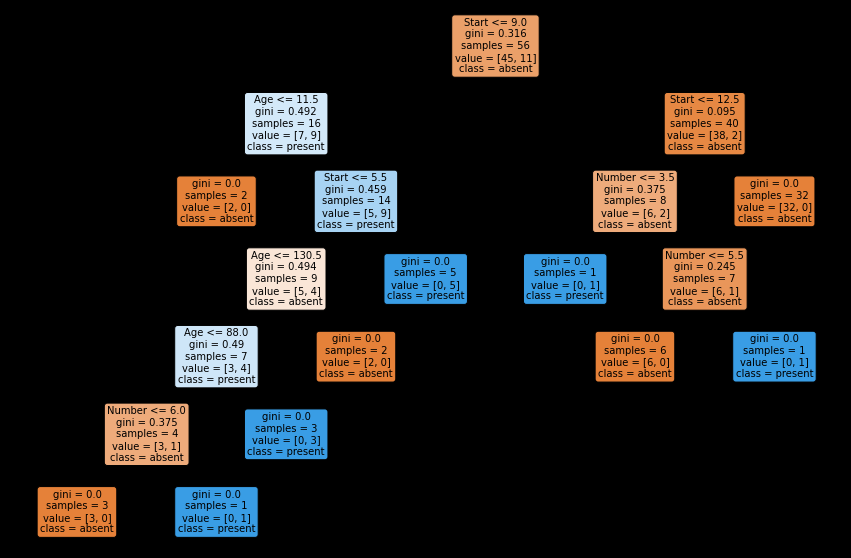

In [ ]:
# Plotar a árvore
from sklearn import tree

fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(model, 
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=X_train.columns,
               class_names=["absent", "present"]
               )
plt.show()

## Florestas Aleatórias
- Escolha aleatória dos parametros usados para construção das diversas florestas
- Melhora o resultado do algoritimo 
- Pede para todas as arvores para dar previsao, usa a media das arvores
- Reduz o overfiting


In [ ]:
# ensemble: agora a árvore de decisão é floresta aleatória
from sklearn.ensemble import RandomForestClassifier

# 100 árvores aleatórias
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[17  2]
 [ 5  1]]
              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25

